# Módulo 4: Regresión lineal con Python

### Modelo de regresión lineal y sus errores: La línea gris representa la recta de regresión (el modelo) y los segmentos rojos el error entre esta y cada observación

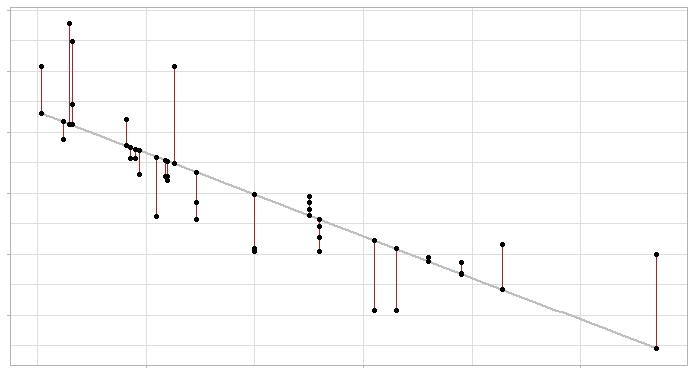

## Ejemplo regresión lineal simple (Publicidad)

Las empresas pueden utilizar la regresión lineal para comprender la relación entre el gasto en publicidad y los ingresos.

Por ejemplo, podrían ajustarse a un modelo de regresión lineal simple utilizando el gasto en publicidad como variable de predicción y los ingresos de la firma como variable de respuesta. El modelo de regresión tomaría la siguiente forma:

**`ingresos = β0 + β1 (gasto publicitario)`**

El coeficiente `β0` representaría el ingreso total esperado cuando el gasto publicitario es cero.

El coeficiente `β1` representaría el cambio promedio en los ingresos totales cuando el gasto publicitario aumenta en una unidad (por ejemplo, aumenta en un peso).

Si `β1` es negativo, significaría que una mayor inversión publicitaria se asocia con menos ingresos.

Si `β1` es cercano a cero, significaría que el gasto en publicidad tiene un efecto pequeño sobre el comportamiento de los ingresos.

Si `β1` es positivo, significaría que más gastos publicitarios están asociados con más ingresos.

Dependiendo del valor de `β1`, una empresa puede decidir disminuir o aumentar el monto que destina a campañas publicitarias.

In [1]:
#Importamos todas las librerías que vamos a utilizar
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style #opcional para el estilo del gráfico
style.use('ggplot') or plt.style.use('ggplot') #opcional para tomar el estilo de los graficos ggplot

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr #para hacer correlaciones
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Datos
# ==============================================================================
Publicidades = ["Publicidad1","Publicidad2","Publicidad3","Publicidad4","Publicidad5","Publicidad6","Publicidad7",
                          "Publicidad8","Publicidad9","Publicidad10","Publicidad11","Publicidad12","Publicidad13",
                            "Publicidad14","Publicidad15","Publicidad16","Publicidad17","Publicidad18",
                          "Publicidad19","Publicidad20","Publicidad21","Publicidad22","Publicidad23","Publicidad24",
                          "Publicidad25","Publicidad26","Publicidad27","Publicidad28","Publicidad29"]
Gasto_en_publicidad = [150000.        , 155357.14285714, 160714.28571429, 166071.42857143,
                        171428.57142857, 176785.71428571, 182142.85714286, 187500.        ,
                        192857.14285714, 198214.28571429, 203571.42857143, 208928.57142857,
                        214285.71428571, 219642.85714286, 225000.        , 230357.14285714,
                        235714.28571429, 241071.42857143, 246428.57142857, 251785.71428571,
                        257142.85714286, 262500.        , 267857.14285714, 273214.28571429,
                        278571.42857143, 283928.57142857, 289285.71428571, 294642.85714286,
                        300000.        ]

Ingresos =  [ 800000 ,  857857.14285714,  875714.28571429,
              813571.42857143,  801428.57142857,  899285.71428571,
              909142.85714286,  1029000.        ,  1044857.14285714,
              1046714.28571429,  1012571.42857143,  898428.57142857,
              1299285.71428571, 1136142.85714286, 1459000.        ,
              862857.14285714, 1325714.28571429, 1263571.42857143,
              1691428.57142857, 1059285.71428571, 1517142.85714286,
              1935000.        , 1022857.14285714, 1460714.28571429,
              1048571.42857143, 1236428.57142857, 1284285.71428571,
              1222142.85714286, 1320000.   ]     
datos = pd.DataFrame({'Campañas publicitarias': Publicidades, 'Gasto en publicidad': Gasto_en_publicidad, 'Ingresos': Ingresos})
datos

,Campañas publicitarias,Gasto en publicidad,Ingresos
0,Publicidad1,150000.000000,8.000000e+05
1,Publicidad2,155357.142857,8.578571e+05
2,Publicidad3,160714.285714,8.757143e+05
3,Publicidad4,166071.428571,8.135714e+05
4,Publicidad5,171428.571429,8.014286e+05
5,Publicidad6,176785.714286,8.992857e+05
6,Publicidad7,182142.857143,9.091429e+05
7,Publicidad8,187500.000000,1.029000e+06
8,Publicidad9,192857.142857,1.044857e+06
9,Publicidad10,198214.285714,1.046714e+06


Text(0, 0.5, 'Ingresos')

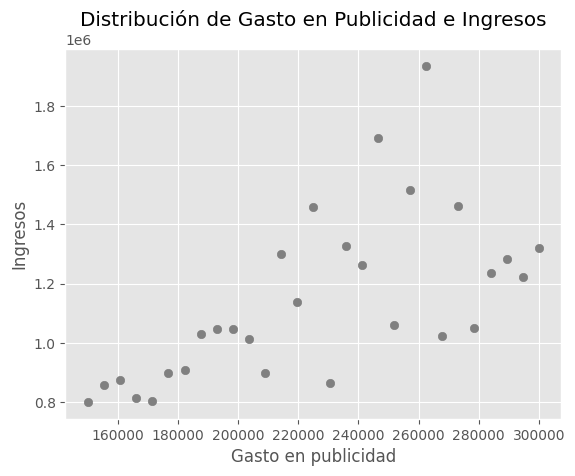

In [4]:
# Gráfico 
# ==============================================================================

x=datos['Gasto en publicidad']
y=datos['Ingresos']
plt.scatter(x,y, c='grey')
plt.title('Distribución de Gasto en Publicidad e Ingresos')
plt.xlabel("Gasto en publicidad")
plt.ylabel("Ingresos")

In [5]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['Gasto en publicidad'], y =  datos['Ingresos'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6359423809222331
P-value:  0.00020920728461224584


## Ajuste del modelo 

## Scikit-learn

Scikit-learn es un paquete de Python que facilita la aplicación de una variedad de algoritmos de aprendizaje automático (ML) para el análisis de datos predictivos, como la regresión lineal.

In [40]:
# División de los datos en train y test
# ==============================================================================
X = datos[['Gasto en publicidad']] 
y = datos['Ingresos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)### Scikit-learn

LinearRegression()

#### Información del modelo

In [41]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [241924.02574184]
Coeficiente: [('Gasto en publicidad', 4.060590315020183)]
Coeficiente de determinación R^2: 0.40182868751053424


In [43]:
X_test

array([[187500.        ],
       [203571.42857143],
       [171428.57142857],
       [155357.14285714],
       [294642.85714286],
       [192857.14285714]])

#### Error de test 

In [44]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:6,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[1003284.70980812]
 [1068544.19701381]
 [ 938025.22260243]
 [ 872765.73539675]
 [1438347.95784601]
 [1025037.87221   ]]

El error (rmse) de test es: 107867.65599507185


## Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de **Scikitlearn** ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [15]:
### Statsmodels# División de los datos en train y test
# ==============================================================================
X = datos[['Gasto en publicidad']]
y = datos['Ingresos']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [16]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     11.45
Date:                Fri, 08 Sep 2023   Prob (F-statistic):            0.00281
Time:                        16:14:41   Log-Likelihood:                -317.06
No. Observations:                  23   AIC:                             638.1
Df Residuals:                      21   BIC:                             640.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.419e+05   2.82e+05      0.857      0.4

#### Intervalo de confianza al 95% 

In [17]:
#Intervalo de confianza del 95%
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-3.45116337e+05,  8.28964389e+05],
       [ 1.56458854e+00,  6.55659209e+00]])

#### Predicciones del modelo

In [18]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')
predicciones.head(10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
9,8.510126e+05,110190.505534,6.218589e+05,1.080166e+06,291165.934459,1.410859e+06,150000.000000,8.000000e+05
6,8.945189e+05,98985.046143,6.886682e+05,1.100370e+06,343799.968236,1.445238e+06,160714.285714,8.757143e+05
0,9.162721e+05,93542.028520,7.217408e+05,1.110803e+06,369683.306388,1.462861e+06,166071.428571,8.135714e+05
10,9.597784e+05,83080.119213,7.870038e+05,1.132553e+06,420549.406960,1.499007e+06,176785.714286,8.992857e+05
20,9.815315e+05,78118.048987,8.190762e+05,1.143987e+06,445519.803772,1.517543e+06,182142.857143,9.091429e+05
14,1.046791e+06,64798.942456,9.120343e+05,1.181548e+06,518514.374862,1.575068e+06,198214.285714,1.046714e+06
13,1.090297e+06,57821.315877,9.700514e+05,1.210543e+06,565534.610411,1.615060e+06,208928.571429,8.984286e+05
18,1.112051e+06,55131.943531,9.973974e+05,1.226704e+06,588541.032349,1.635560e+06,214285.714286,1.299286e+06
2,1.133804e+06,53088.997935,1.023399e+06,1.244208e+06,611208.220121,1.656399e+06,219642.857143,1.136143e+06
1,1.155557e+06,51769.064918,1.047897e+06,1.263217e+06,633534.391798,1.677579e+06,225000.000000,1.459000e+06


In [ ]:
# Gráfico del modelo 
# ==============================================================================

plt.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
plt.plot(predicciones['x'], predicciones["mean"], linestyle='-', color = 'green', label="OLS")
plt.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
plt.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='blue')
plt.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
plt.title('Ajuste del modelo')
plt.xlabel("Gasto en publicidad")
plt.ylabel("Ingresos")
plt.legend();

#### Error de test del modelo

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

## Ejemplo regresión lineal simple (Bateos)

Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido.

### Librerías

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Datos

In [ ]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

### Representación gráfica 

In [ ]:
# Gráfico 
# ==============================================================================

x=datos['bateos']
y=datos['runs']
plt.scatter(x,y, c='firebrick')
plt.title('Distribución de bateos y runs')
plt.xlabel("Bateos")
plt.ylabel("Runs")

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

## Ajuste del modelo 

### Scikit-learn

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

##### La interpretación del coeficiente de interés es la siguiente: Cuando aumenta en una unidad la cantidad de bateos, la cantidad de runs aumenta, en promedio, en 0.55 

In [ ]:
X_test

In [ ]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:6,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

### Statsmodels

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

### Intervalos de confianza de los coeficientes 

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

### Predicciones 

In [ ]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')
predicciones.head(100)

### Representación gráfica del modelo 

In [ ]:
# Gráfico del modelo 
# ==============================================================================

plt.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
plt.plot(predicciones['x'], predicciones["mean"], linestyle='-', color='green', label="OLS")
plt.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
plt.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='blue')
plt.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
plt.title('Ajuste del modelo')
plt.xlabel("Bateos")
plt.ylabel("Runs")
plt.legend();

### Error de test

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")